# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import math as m
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -149.2833, 'lat': -17.75},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 303.08,
  'feels_like': 310.08,
  'temp_min': 302.63,
  'temp_max': 303.08,
  'pressure': 1010,
  'humidity': 83,
  'sea_level': 1010,
  'grnd_level': 991},
 'visibility': 10000,
 'wind': {'speed': 7.99, 'deg': 102, 'gust': 8.48},
 'rain': {'1h': 0.4},
 'clouds': {'all': 100},
 'dt': 1712802417,
 'sys': {'type': 1,
  'id': 7318,
  'country': 'PF',
  'sunrise': 1712765109,
  'sunset': 1712807453},
 'timezone': -36000,
 'id': 4034745,
 'name': 'Afaahiti',
 'cod': 200}

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | tavda
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | mesquite
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | oranjemund
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bikenibeu village
Processing Record 15 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 16 of Set 1 | hayma'
City not found. Skipping...
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | krapivinskiy
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,295.18,83,0,3.09,PE,1712802251
1,aasiaat,68.7098,-52.8699,263.82,82,100,1.62,GL,1712802420
2,grytviken,-54.2811,-36.5092,274.33,95,32,6.53,GS,1712802420
3,tavda,58.0425,65.2726,271.87,88,90,2.24,RU,1712802420
4,albany,42.6001,-73.9662,285.14,95,100,1.28,US,1712802138


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,295.18,83,0,3.09,PE,1712802251
1,aasiaat,68.7098,-52.8699,263.82,82,100,1.62,GL,1712802420
2,grytviken,-54.2811,-36.5092,274.33,95,32,6.53,GS,1712802420
3,tavda,58.0425,65.2726,271.87,88,90,2.24,RU,1712802420
4,albany,42.6001,-73.9662,285.14,95,100,1.28,US,1712802138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

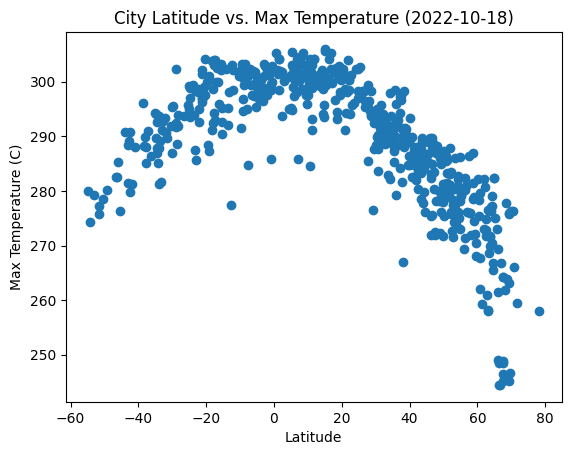

<Figure size 640x480 with 0 Axes>

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

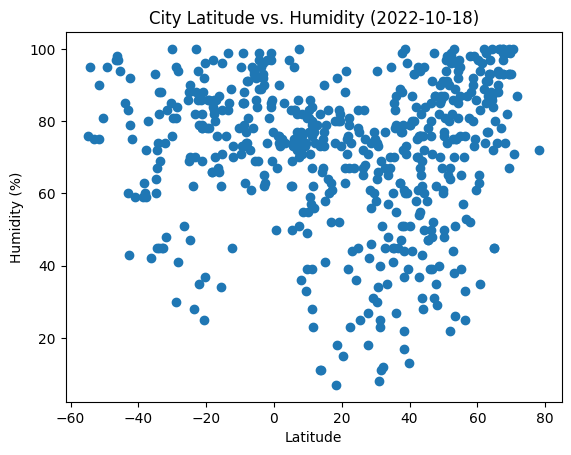

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

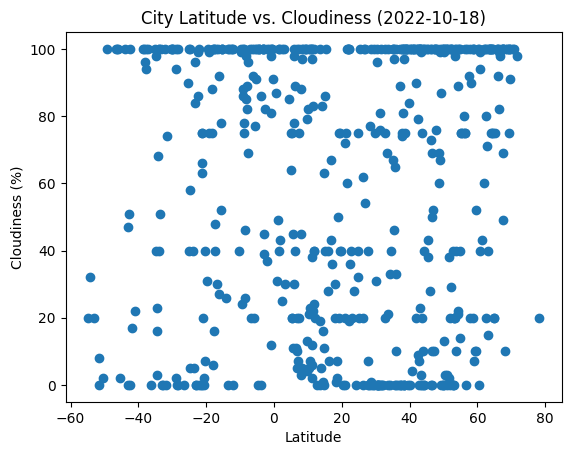

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

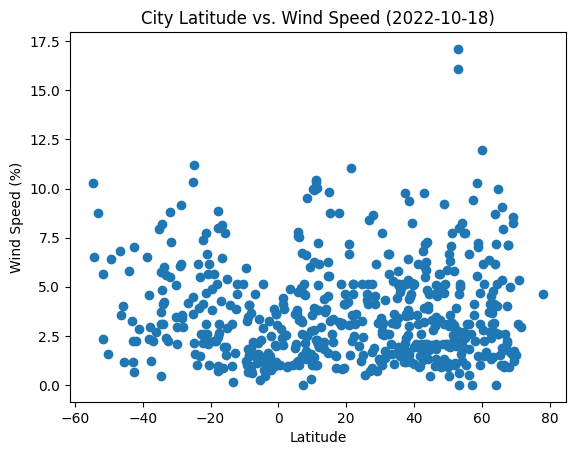

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")           
plt.show();

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
def plot_lr(x_values,y_values, text_coordinates):
    (slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y ="+str(round(slope,2)) + " x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize = 15, color="red")
    print(f"The r-value is: {rvalue **2}")
    plt.grid()
    plt.show()
#This section was written by the TA

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aasiaat,68.7098,-52.8699,263.82,82,100,1.62,GL,1712802420
3,tavda,58.0425,65.2726,271.87,88,90,2.24,RU,1712802420
4,albany,42.6001,-73.9662,285.14,95,100,1.28,US,1712802138
6,georgetown,5.4112,100.3354,303.12,69,20,3.60,MY,1712802158
7,mesquite,32.7668,-96.5992,288.68,77,100,6.69,US,1712802421


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,295.18,83,0,3.09,PE,1712802251
2,grytviken,-54.2811,-36.5092,274.33,95,32,6.53,GS,1712802420
5,carnarvon,-24.8667,113.6333,298.83,47,5,11.21,AU,1712802420
9,oranjemund,-28.5500,16.4333,288.53,84,0,3.55,NaN,1712802058
10,mount gambier,-37.8333,140.7667,288.04,59,100,2.97,AU,1712802421


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7552400206167283


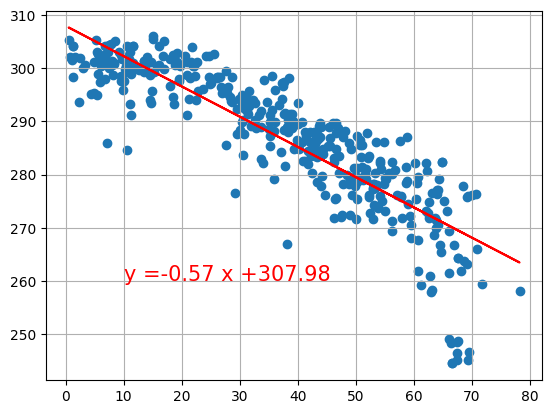

In [33]:
#Method using formula the TA made--the TA built this for me:
plot_lr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],text_coordinates=(10,260))

the r-value: 0.7544010524090542


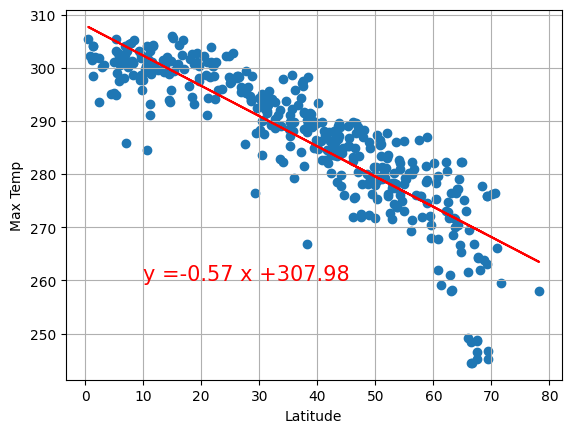

In [75]:
# Linear regression on Northern Hemisphere
#Method I did on my own without defining a formula
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(10,260), fontsize = 15, color="red")#built off of script the TA provided earlier
plt.grid() #The TA showed me how to put the grid on
plt.show();

Discussion about the Linear Relationship: The correlation is negative because as the x axis values increase, the y axis values decrease. The correlation is strong, as indicated by an r-value larger than 0.7 and a strong clustering of points around the red line.

The r-value is: 0.5526437187920644


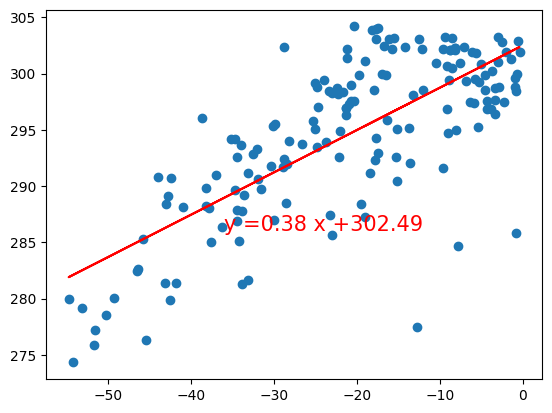

In [26]:
plot_lr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], text_coordinates=(-36,286))
#I believe the TA wrote this, but I may have written this code by copying the structure for the northern hemisphere

the r-value: 0.5526437187920644


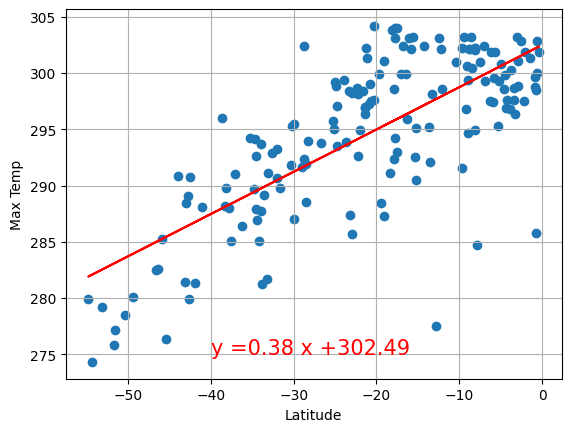

In [80]:
# Linear regression on Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(-40,275), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();


**Discussion about the linear relationship:** The correlation is positive because as the x axis values increase, the y axis values increase. The correlation is moderate, as indicated by an r-value between 0.5 and 0.7 and a moderate clustering of points around the red line.

### Humidity vs. Latitude Linear Regression Plot

the r-value: 0.056503297846616826


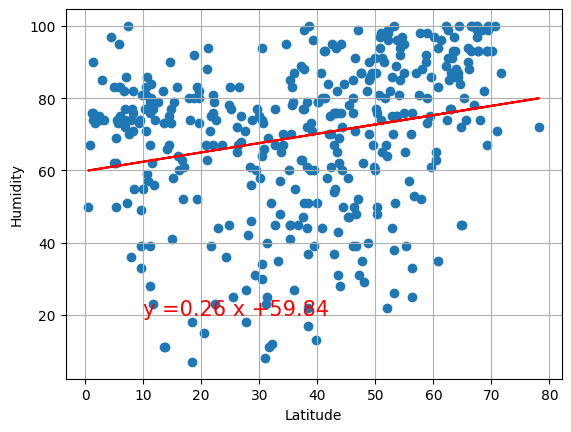

In [81]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(10,20), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.056503297846616826


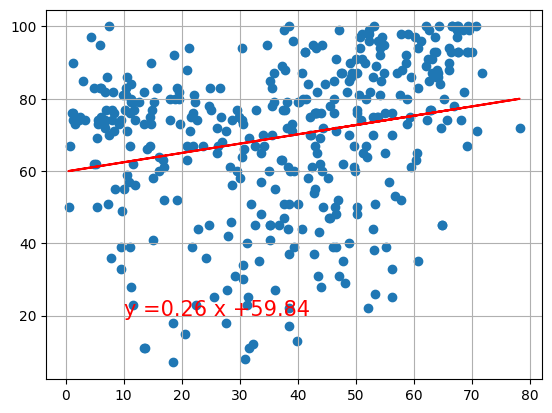

In [49]:
plot_lr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], text_coordinates=(10,20))

**Discussion about the linear relationship:** The correlation is moderately positive because as the x axis values increase, the y axis values increase, generally speaking. This is also indicated by the slope of the red line. The correlation is weak, as indicated by an r-value between 0.5 and 0.7 and a moderate slope of the red line, with moderate clustering.

the r-value: 0.028039125680506965


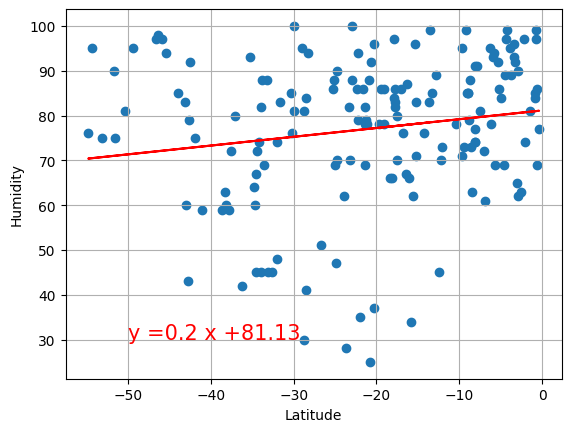

In [82]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(-50,30), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.028039125680506965


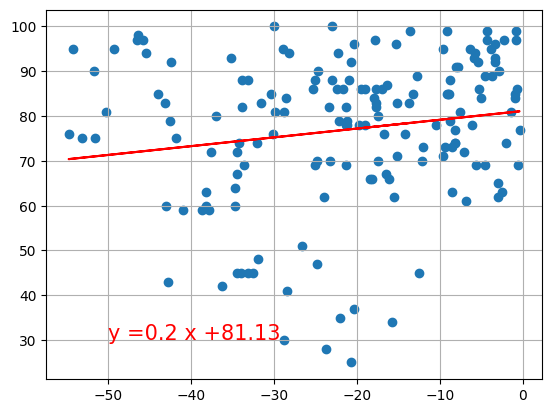

In [62]:
plot_lr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], text_coordinates=(-50,30))

**Discussion about the linear relationship:** The correlation is weakly positive because as the x axis values increase, the y axis values increase, generally speaking. This is also indicated by the slope of the red line. The correlation is weak, as indicated by an r-value between 0.0 and 0.3 and a moderate slope of the red line, with weak clustering.

### Cloudiness vs. Latitude Linear Regression Plot

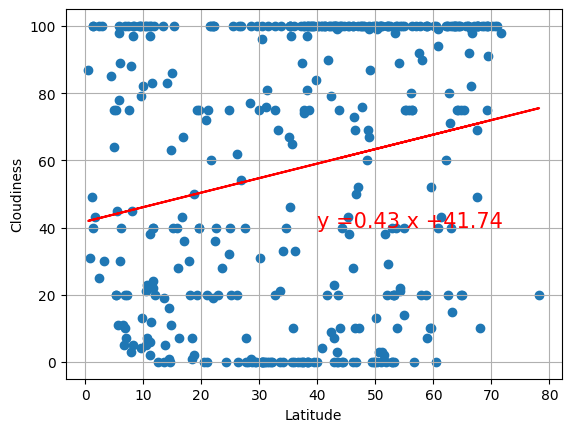

In [44]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(40,40), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.04448294439136179


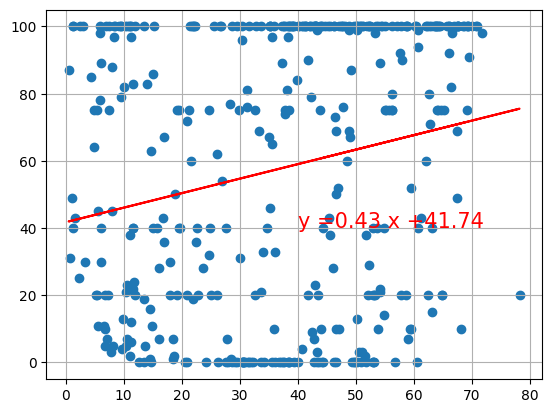

In [52]:
plot_lr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], text_coordinates=(40,40))

**Discussion about the linear relationship:** The correlation is positive but weak. The red line has a positive slope, and is relatively steep, but the points are not clustered very well, and the r-value is close to zero.

the r-value: 0.06173119096169703


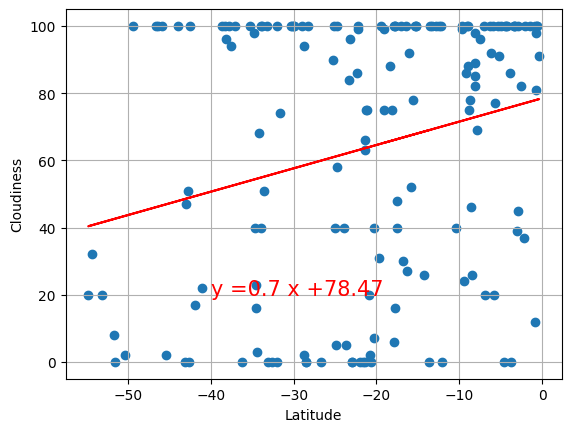

In [83]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(-40,20), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.06173119096169703


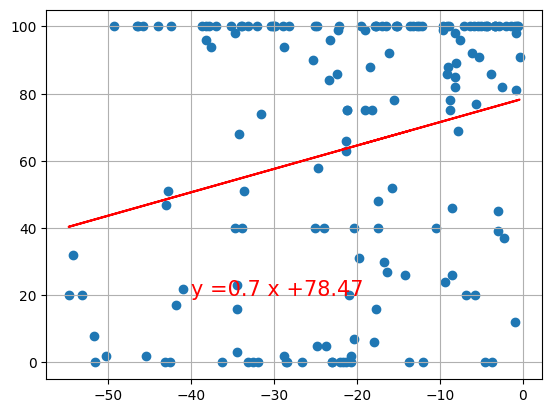

In [54]:
plot_lr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], text_coordinates=(-40,20))

**Discussion about the linear relationship:** The correlation is positive but weak. The red line has a positive slope, and is relatively steep, but the points are not clustered very well, and the r-value is close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value: 0.0007609219895488246


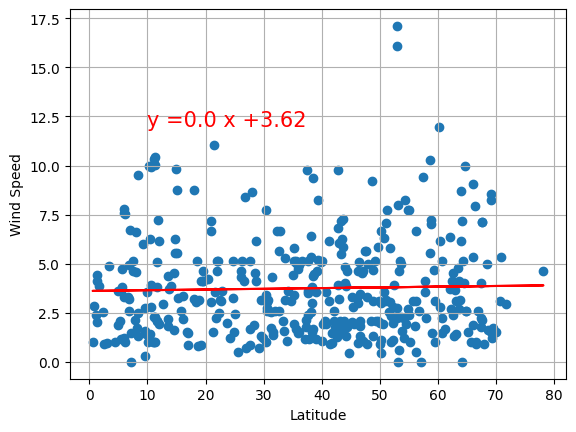

In [84]:
# Northern Hemisphere
model = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
y_values = northern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(10,12), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.0007609219895488246


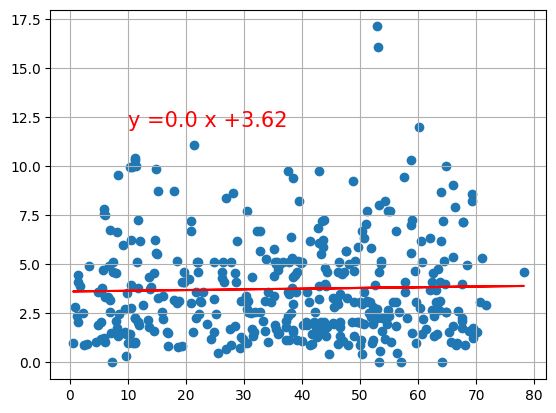

In [55]:
plot_lr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], text_coordinates=(10,12))

**Discussion about the linear relationship:** There is practically no correlation here. The data is everywhere, the red line is flat, and the r-value is almost zero.

the r-value: 0.14220285138277394


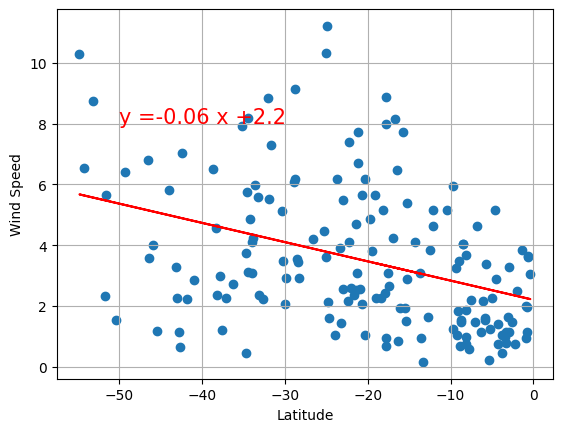

In [85]:
# Southern Hemisphere
model = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
y_values = southern_hemi_df["Lat"]*model[0] + model[1]
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],y_values, color = "red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate("y ="+str(round(model[0],2)) + " x +" + str(round(model[1],2)),(-50,8), fontsize = 15, color="red")
(slope, intercept, rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f"the r-value: {rvalue**2}") #line was copied from a previous problem where the TA provided this
plt.grid()
plt.show();

The r-value is: 0.14220285138277394


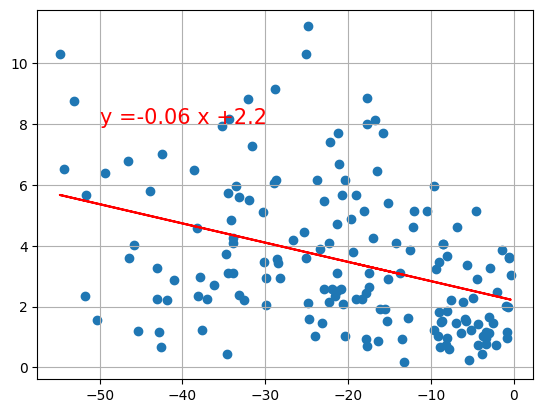

In [56]:
plot_lr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], text_coordinates=(-50,8))

**Discussion about the linear relationship:** The correlation is weakly negative. Points lack clustering and are spread out. The slope is negative. The r-value is below 0.3, indicating weak correlation.